In [2]:
import cv2
import mediapipe as mp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [3]:
os.getcwd()

'C:\\Users\\MAHIREDDY\\OneDrive\\Desktop\\Internships_2024\\SSN_summer_research_internship_2024'

In [4]:
path='C:\\Users\\MAHIREDDY\\OneDrive\\Desktop\\Internships_2024\\SSN_summer_research_internship_2024\\My_dataset'

In [5]:
folders_img_paths={}

for folder in os.scandir(path):
    label=folder.path.split('\\')[-1]
    print(label)
    folders_img_paths[label]=[]
    for img_path in os.scandir(folder.path):
        folders_img_paths[label].append(img_path.path)
folders_img_paths

Amithab
deepika_padukone
Mahesh_babu
priyanka_chopra
SRK
virat_kohli


{'Amithab': ['C:\\Users\\MAHIREDDY\\OneDrive\\Desktop\\Internships_2024\\SSN_summer_research_internship_2024\\My_dataset\\Amithab\\Amithab_1 (1).jpg',
  'C:\\Users\\MAHIREDDY\\OneDrive\\Desktop\\Internships_2024\\SSN_summer_research_internship_2024\\My_dataset\\Amithab\\Amithab_1 (14).jpg',
  'C:\\Users\\MAHIREDDY\\OneDrive\\Desktop\\Internships_2024\\SSN_summer_research_internship_2024\\My_dataset\\Amithab\\Amithab_1 (15).jpg',
  'C:\\Users\\MAHIREDDY\\OneDrive\\Desktop\\Internships_2024\\SSN_summer_research_internship_2024\\My_dataset\\Amithab\\Amithab_1 (16).jpg',
  'C:\\Users\\MAHIREDDY\\OneDrive\\Desktop\\Internships_2024\\SSN_summer_research_internship_2024\\My_dataset\\Amithab\\Amithab_1 (17).jpg',
  'C:\\Users\\MAHIREDDY\\OneDrive\\Desktop\\Internships_2024\\SSN_summer_research_internship_2024\\My_dataset\\Amithab\\Amithab_1 (18).jpg',
  'C:\\Users\\MAHIREDDY\\OneDrive\\Desktop\\Internships_2024\\SSN_summer_research_internship_2024\\My_dataset\\Amithab\\Amithab_1 (19).jpg',
  '

In [6]:
def create_new_folder(folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        print(f"Folder '{folder_path}' created.")
    else:
        print(f"Folder '{folder_path}' already exists.")
    return None

In [7]:
mp_face_detector=mp.solutions.face_detection
mp_draw_utils=mp.solutions.drawing_utils

In [8]:
def return_faces(img_path):
    faces=[]
    img=cv2.imread(img_path)
    if np.any(img)==None:
        print('img not able read....................!')
        return None
    rgb_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    with mp_face_detector.FaceDetection(model_selection=1,min_detection_confidence=0.5) as face_detector:
        result=face_detector.process(rgb_img)
        if result.detections!=None:
            for detection in result.detections:
                box=detection.location_data.relative_bounding_box
                x_start,y_start=int(box.xmin*img.shape[1]),int(box.ymin*img.shape[0])
                x_end,y_end=int((box.xmin+box.width)*img.shape[1]),int((box.ymin+box.height)*img.shape[0])
                roi_img=img[y_start:y_end,x_start:x_end]
                faces.append(roi_img)
        else:
            return None
    return faces
        

In [9]:
new_folder='C:\\Users\\MAHIREDDY\\OneDrive\\Desktop\\Internships_2024\\SSN_summer_research_internship_2024\\croped_My_dataset'

In [10]:
def ready_new_cropped_dataset(new_folder_path,folder_img_paths_dict):
    new_img_paths={}
    new_img_labels=[]
    create_new_folder(new_folder_path)
    for label,paths in folder_img_paths_dict.items():
        new_img_labels.append(label)
        new_img_paths[label]=[]
        new_folder=new_folder_path+'\\'+label
        create_new_folder(new_folder)
        count=0
        for path in paths:
            faces=return_faces(path)
            if faces != None:
                for face in faces:
                    face=cv2.resize(face,(128,128))
                    new_img_path=new_folder+'\\'+label+f'_{str(count)}.png'
                    cv2.imwrite(new_img_path,face)
                    new_img_paths[label].append(new_img_path)
                    count+=1
            else:
                continue 
    return (new_img_paths,new_img_labels)
        

In [11]:
new_img_paths,new_img_labels=ready_new_cropped_dataset(new_folder,folders_img_paths)

Folder 'C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\croped_My_dataset' already exists.
Folder 'C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\croped_My_dataset\Amithab' already exists.
Folder 'C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\croped_My_dataset\deepika_padukone' already exists.
Folder 'C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\croped_My_dataset\Mahesh_babu' already exists.
img not able read....................!
img not able read....................!
img not able read....................!
Folder 'C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\croped_My_dataset\priyanka_chopra' already exists.
Folder 'C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\croped_My_dataset\SRK' already exists.
Folder 'C:\Users\MAHIREDDY\OneDriv

In [12]:
new_img_paths

{'Amithab': ['C:\\Users\\MAHIREDDY\\OneDrive\\Desktop\\Internships_2024\\SSN_summer_research_internship_2024\\croped_My_dataset\\Amithab\\Amithab_0.png',
  'C:\\Users\\MAHIREDDY\\OneDrive\\Desktop\\Internships_2024\\SSN_summer_research_internship_2024\\croped_My_dataset\\Amithab\\Amithab_1.png',
  'C:\\Users\\MAHIREDDY\\OneDrive\\Desktop\\Internships_2024\\SSN_summer_research_internship_2024\\croped_My_dataset\\Amithab\\Amithab_2.png',
  'C:\\Users\\MAHIREDDY\\OneDrive\\Desktop\\Internships_2024\\SSN_summer_research_internship_2024\\croped_My_dataset\\Amithab\\Amithab_3.png',
  'C:\\Users\\MAHIREDDY\\OneDrive\\Desktop\\Internships_2024\\SSN_summer_research_internship_2024\\croped_My_dataset\\Amithab\\Amithab_4.png',
  'C:\\Users\\MAHIREDDY\\OneDrive\\Desktop\\Internships_2024\\SSN_summer_research_internship_2024\\croped_My_dataset\\Amithab\\Amithab_5.png',
  'C:\\Users\\MAHIREDDY\\OneDrive\\Desktop\\Internships_2024\\SSN_summer_research_internship_2024\\croped_My_dataset\\Amithab\\Amit

In [13]:
labels_dict={
    'Amithab':0,
'deepika_padukone':1,
'Mahesh_babu':2,
'priyanka_chopra':3,
'SRK':4,
'virat_kohli':5
}

In [14]:
x,y=[],[]

for label,new_img_path in new_img_paths.items():
    for img_path in new_img_path:
        print(img_path)
        img=cv2.imread(img_path)
        print(img)
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        x.append(img)
        y.append(labels_dict[label])

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\croped_My_dataset\Amithab\Amithab_0.png
[[[ 30  29  19]
  [ 39  40  30]
  [ 29  31  25]
  ...
  [243 235 205]
  [243 235 205]
  [243 235 205]]

 [[ 33  34  25]
  [ 35  37  31]
  [ 37  40  35]
  ...
  [243 235 205]
  [243 235 205]
  [243 235 205]]

 [[ 36  38  32]
  [ 23  27  22]
  [ 12  16  11]
  ...
  [243 235 205]
  [243 235 205]
  [243 235 205]]

 ...

 [[ 43  37  30]
  [ 43  38  29]
  [ 42  37  28]
  ...
  [243 232 202]
  [243 232 202]
  [243 232 202]]

 [[ 45  37  30]
  [ 45  37  30]
  [ 44  36  29]
  ...
  [243 232 202]
  [243 232 202]
  [243 232 202]]

 [[ 45  37  30]
  [ 45  37  30]
  [ 42  36  29]
  ...
  [243 232 202]
  [243 232 202]
  [243 232 202]]]
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\croped_My_dataset\Amithab\Amithab_1.png
[[[ 42  72  61]
  [ 39  68  59]
  [ 30  58  52]
  ...
  [ 27  32  40]
  [ 56  66  72]
  [ 67  79  83]]

 [[ 36  

In [15]:
x_array=np.array(x)/255.0
y_array=np.array(y)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x_array,y_array,stratify=y_array,random_state=15)

In [18]:
x_train.shape

(97, 128, 128, 3)

In [19]:
x_test.shape

(33, 128, 128, 3)

In [20]:
y_train.shape

(97,)

In [21]:
y_test.shape

(33,)

In [22]:
y_train

array([5, 2, 3, 2, 1, 2, 3, 5, 4, 0, 1, 3, 5, 1, 5, 0, 3, 0, 2, 1, 1, 3,
       4, 1, 2, 0, 4, 0, 1, 4, 1, 4, 2, 4, 4, 5, 1, 3, 4, 0, 0, 3, 4, 5,
       2, 5, 3, 0, 2, 4, 1, 2, 5, 4, 1, 4, 0, 0, 5, 3, 2, 2, 5, 0, 1, 3,
       1, 4, 4, 2, 5, 4, 0, 3, 3, 0, 3, 0, 0, 4, 0, 4, 2, 1, 3, 2, 4, 4,
       4, 4, 4, 4, 4, 2, 4, 0, 0])

# CNN Model

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten

In [24]:
data_augmentation = tf.keras.Sequential([
   layers.RandomFlip("horizontal"),  
   layers.RandomRotation(0.1),       
   layers.RandomZoom(0.2),           
   layers.RandomTranslation(0.2, 0.2)
])

sample_image = tf.random.uniform([240, 240, 3])  
sample_image = tf.expand_dims(sample_image, 0)  

augmented_image = data_augmentation(sample_image)

In [25]:
model =keras.models.Sequential([
    data_augmentation,  # Add the data augmentation layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(240, 240, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(6, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train,y_train,epochs=50,batch_size=32)

C:\Users\MAHIREDDY\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "functional" is incompatible with the layer: expected shape=(None, 240, 240, 3), found shape=(None, 128, 128, 3)[0m

Arguments received by Sequential.call():
  • args=('<KerasTensor shape=(None, 128, 128, 3), dtype=float32, sparse=None, name=keras_tensor_5>',)
  • kwargs={'mask': 'None'}

In [26]:
model.evaluate(x_test,y_test)

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "functional" is incompatible with the layer: expected shape=(None, 240, 240, 3), found shape=(None, 128, 128, 3)[0m

Arguments received by Sequential.call():
  • args=('<KerasTensor shape=(None, 128, 128, 3), dtype=float32, sparse=None, name=keras_tensor_5>',)
  • kwargs={'mask': 'None'}

In [ ]:
np.argmax(model.predict(x_test)[1])

In [ ]:
plt.imshow(x_test[1])

In [ ]:
y_test[0]

In [ ]:
%pip install tensorflow_hub

In [27]:
import tensorflow_hub as hub

In [28]:
from keras_facenet import FaceNet

In [29]:
face_net_model=FaceNet()

In [30]:
face_embeddings = face_net_model.embeddings(x_train)

4/4 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step


In [31]:
face_embeddings.shape

(97, 512)

In [32]:
X_train_embed, X_val_embed, y_train_embed, y_val_embed = train_test_split(face_embeddings, y_train, test_size=0.2, random_state=42)

In [33]:
num_classes = len(np.unique(y_train))  # Assuming y_train contains the labels

classifier_model =keras. models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(face_embeddings.shape[1],)),
    layers.Dense(num_classes, activation='softmax')
])

C:\Users\MAHIREDDY\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
classifier_model.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

In [35]:
classifier_model.fit(X_train_embed, y_train_embed, epochs=10, validation_data=(X_val_embed, y_val_embed))


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 272ms/step - accuracy: 0.2288 - loss: 1.7884 - val_accuracy: 0.3000 - val_loss: 1.7598
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2640 - loss: 1.7623 - val_accuracy: 0.3000 - val_loss: 1.7551
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.2249 - loss: 1.7677 - val_accuracy: 0.3000 - val_loss: 1.7587
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2679 - loss: 1.7529 - val_accuracy: 0.3000 - val_loss: 1.7635
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2679 - loss: 1.7454 - val_accuracy: 0.3000 - val_loss: 1.7683
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2679 - loss: 1.7492 - val_accuracy: 0.3000 - val_loss: 1.7746
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.2328 - loss: 1.7669 - val_accuracy: 0.3000 - val_loss: 1.7835
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.2328 - loss: 1.7718 - val_accuracy: 0.3000 - val_loss: 1.7917

In [37]:
face_embeddings = face_net_model.embeddings(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step


In [56]:
classifier_model.evaluate(face_embeddings,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2449 - loss: 1.7790 


[1.776568055152893, 0.24242424964904785]

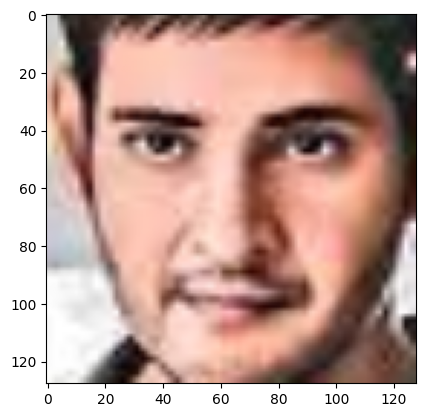

In [47]:
plt.imshow(x_test[3])